In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
data1 = pd.read_csv("NextYearData_actualData_train.txt")
data2 = pd.read_csv("ThisYearData_actualData_train.txt")
data3 = pd.read_csv("ThisYearData_actualData_test.txt")

data4 = pd.read_csv("NextYearData_actualData_test.txt")

data5 = pd.read_csv("Predicted_NextYearData.txt")
data5.columns = data4.columns

data = pd.concat([data1, data2, data3])

print(data.shape)
data.head()

(70592, 16)


,Unnamed: 0,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS
0,0,696760,20150404,5.67,89.0,24.3,13.0,3.8,1.0,0.0,0.0,1.0,1.0,39.0,96.0,0
1,1,819364,20150923,5.80,173.0,26.2,13.0,4.8,1.0,0.0,0.0,0.0,1.0,43.0,92.0,0
2,2,816630,20170928,5.51,74.0,21.8,21.0,7.4,2.0,3.0,0.0,0.0,0.0,45.0,108.0,1
3,3,3869001,20161109,5.14,224.0,25.1,32.0,4.1,3.0,3.0,0.0,0.0,0.0,47.0,90.0,0
4,4,2853000,20161121,5.75,189.0,19.5,12.0,2.6,1.0,0.0,0.0,0.0,1.0,38.0,89.0,0


<IPython.core.display.Javascript object>

In [3]:
diabetic = data[data.CLASS == 2]
prediabetic = data[data.CLASS == 1]
normal = data[data.CLASS == 0]

print(diabetic.shape[0], prediabetic.shape[0], normal.shape[0])

1043 19307 50242


<IPython.core.display.Javascript object>

In [4]:
diabetic_test = diabetic.sample(200, random_state=randomseed)
prediabetic_test = prediabetic.sample(200, random_state=randomseed)
normal_test = normal.sample(200, random_state=randomseed)
test = pd.concat([diabetic_test, prediabetic_test, normal_test])

diabetic_train = diabetic.drop(diabetic_test.index)
prediabetic_train = prediabetic.drop(prediabetic_test.index).sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
normal_train = normal.drop(normal_test.index).sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

<IPython.core.display.Javascript object>

In [5]:
xtrain = train.iloc[:, 3:-2]
ytrain = train.iloc[:, -1]
xtest = test.iloc[:, 3:-2]
ytest = test.iloc[:, -1]

<IPython.core.display.Javascript object>

In [6]:
# x = data.iloc[:, 3:-2]
# y = data.iloc[:, -1]

# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, random_state=randomseed, test_size=0.2
# )

# sm = SMOTE(random_state=randomseed)
# X_res, y_res = sm.fit_resample(xtrain, ytrain)

# print("Resampled dataset shape %s" % Counter(y_res))
# print(
#     y_res[y_res == 0].shape[0], y_res[y_res == 1].shape[0], y_res[y_res == 2].shape[0]
# )
# print(X_res.shape, y_res.shape)

# xtrain = X_res
# ytrain = y_res

# # y_res2 = y_res.copy()
# # from keras.utils import to_categorical
# # y_res2 = to_categorical(y_res)

# # xtrain, xtest, ytrain, ytest = train_test_split(
# #     X_res, y_res2, random_state=randomseed, test_size=0.2
# # )

<IPython.core.display.Javascript object>

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

<IPython.core.display.Javascript object>

0.695


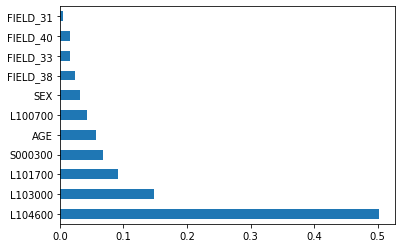

Index(['L104600', 'L103000', 'L101700', 'S000300', 'AGE', 'L100700', 'SEX',
       'FIELD_38', 'FIELD_33', 'FIELD_40', 'FIELD_31'],
      dtype='object')


<IPython.core.display.Javascript object>

In [8]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=test.iloc[:, 3:-2].columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [9]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.815
Accuracy on test set: 0.695


,0,1,2
0,129,71,0
1,59,123,18
2,0,35,165


<IPython.core.display.Javascript object>

In [10]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.66       200
           1       0.54      0.61      0.57       200
           2       0.90      0.82      0.86       200

    accuracy                           0.69       600
   macro avg       0.71      0.69      0.70       600
weighted avg       0.71      0.69      0.70       600



<IPython.core.display.Javascript object>

In [11]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(xtrain, ytrain)

y_pred = xgb_model.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.715


,0,1,2
0,130,67,3
1,51,134,15
2,2,33,165


<IPython.core.display.Javascript object>

In [12]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       200
           1       0.57      0.67      0.62       200
           2       0.90      0.82      0.86       200

    accuracy                           0.71       600
   macro avg       0.73      0.71      0.72       600
weighted avg       0.73      0.71      0.72       600



<IPython.core.display.Javascript object>

In [13]:
# =====================================
pred5 = rf.predict((data5.iloc[:, 3:-2]))

# temp=data5.iloc[:,3:-2]
# temp.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
# pred5= xgb_model.predict((temp))

print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx

0.660860491250602


,0,1,2
0,5590,2956,34
1,955,2468,219
2,3,58,175


<IPython.core.display.Javascript object>

In [14]:
print(classification_report(data5.iloc[:, -1], pred5))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      8580
           1       0.45      0.68      0.54      3642
           2       0.41      0.74      0.53       236

    accuracy                           0.66     12458
   macro avg       0.57      0.69      0.60     12458
weighted avg       0.73      0.66      0.68     12458



<IPython.core.display.Javascript object>

In [15]:
# ========================================================

<IPython.core.display.Javascript object>

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [17]:
y_pred = neigh.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.56


,0,1,2
0,125,44,31
1,62,73,65
2,9,53,138


<IPython.core.display.Javascript object>

In [18]:
pred5 = neigh.predict((data5.iloc[:, 3:-2]))


print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx

0.5179001444854712


,0,1,2
0,4989,2195,1396
1,941,1308,1393
2,13,68,155


<IPython.core.display.Javascript object>